# 1st attempt

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import VBox, FloatSlider, interactive_output, Layout, HBox, Label
from IPython.display import display, Javascript, HTML


# Constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022**(T-20))
    term2 = 0.026 * (((0.5 * Np * rho_f * N**3 * Di**5) / (pi * D**2 * h))**0.4)
    term3 = (v_s**0.5) * (100 - C_l)
    dC_l_dt = term1 * term2 * term3
    return dC_l_dt


#Plotting function
def plot_kla(T, Np, h, N, D, Di, v_s):
    # Define time span for the x-axis
    time_span = np.linspace(0, 50, 1000)  # More points for a smoother curve

    # Initial oxygen concentration in %
    C_l_initial = 0

    # Solve the differential equation over the time span
    C_l = odeint(kla_equation, C_l_initial, time_span, args=(T, Np, h, N, D, Di, v_s))
    C_l_percent = C_l.flatten()

    # Calculate kla_value
    kla_value = (1.022**(T-20)) * (0.026 * (((0.5 * Np * rho_f * N**3 * Di**5) / (pi * D**2 * h))**0.4)) * (v_s**0.5) * (100 - C_l_initial)    

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(time_span, C_l_percent, label='Oxygen Concentration', color='green', linewidth=2)

    # Interpolate to find the time values for each whole number concentration from 1 to 99
    interpolated_times = np.interp(np.arange(1, 100), C_l_percent, time_span)

    # Plot the points on the curve from 1% to 99%
    for t, C_l_value in zip(interpolated_times, np.arange(1, 100)):
        plt.plot(t, C_l_value, 'go', markersize=4)

    # Now find the time for 99.9%
    t_99_9 = np.interp(99.9, C_l_percent, time_span)
    plt.plot(t_99_9, 99.9, 'go', markersize=6)  # Red dot at 99.9%

    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.xlim(left=0)
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)

    #Display additional calculated values after the graph
    display(HTML(f"<strong>The power input to impeller = {0.5 * Np * rho_f * N**3 * Di**5:.7f} [Nm/s]</strong>"))
    display(HTML(f"<strong>The kla_value = {kla_value:.7f} [1/s] </strong>"))    
    
    plt.show()


# Adjust slider and label width separately
slider_width = '400px'
label_width = '200px'

# Create labelled sliders with HTML labels for better control over text display
T_label = Label('Temperature (°C)', layout=Layout(width=label_width))
T_slider = FloatSlider(min=20, max=50, step=5, value=37, layout=Layout(width=slider_width))
T_widget = HBox([T_label, T_slider])

Np_label = Label('Impeller Power No.', layout=Layout(width=label_width))
Np_slider = FloatSlider(min=1.5, max=36, step=1.5, value=6, layout=Layout(width=slider_width))
Np_widget = HBox([Np_label, Np_slider])

h_label = Label('Reactor Height (m)', layout=Layout(width=label_width))
h_slider = FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, layout=Layout(width=slider_width))
h_widget = HBox([h_label, h_slider])

N_label = Label('Rotation Speed (1/s)', layout=Layout(width=label_width))
N_slider = FloatSlider(min=1, max=35, step=0.1, value=16.7, layout=Layout(width=slider_width))
N_widget = HBox([N_label, N_slider])

D_label = Label('Reactor Diameter (m)', layout=Layout(width=label_width))
D_slider = FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, layout=Layout(width=slider_width))
D_widget = HBox([D_label, D_slider])

Di_label = Label('Impeller Diameter (m)', layout=Layout(width=label_width))
Di_slider = FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, layout=Layout(width=slider_width))
Di_widget = HBox([Di_label, Di_slider])

vs_label = Label('Aeration Rate (m^3/s)', layout=Layout(width=label_width))
vs_slider = FloatSlider(min=0.2, max=42, step=0.2, value=21.23, layout=Layout(width=slider_width))
vs_widget = HBox([vs_label, vs_slider])

# Interactive Output
output = interactive_output(plot_kla, {'T': T_slider, 'Np': Np_slider, 'h': h_slider, 'N': N_slider, 
                                       'D': D_slider, 'Di': Di_slider, 'v_s': vs_slider})

# Display the widgets
input_widgets = VBox([T_widget, Np_widget, h_widget, N_widget, D_widget, Di_widget, vs_widget, output])
input_widgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider, interactive, HBox, VBox, interactive_output
from IPython.display import display, clear_output

# Define the constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation (assuming kla_equation is as previously defined)
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022**(T-20))
    term2 = 0.026 * (((0.5 * Np * rho_f * N**3 * Di**5) / (pi * D**2 * h))**0.4)
    term3 = (v_s**0.5) * (100 - C_l)
    return term1 * term2 * term3

# Define a function to create a set of sliders
def create_sliders():
    return {
        'T': FloatSlider(min=20, max=50, step=1, value=37, description='Temperature (°C)'),
        'Np': FloatSlider(min=1.5, max=36, step=1.5, value=6, description='Impeller Power No.'),
        'h': FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, description='Reactor Height (m)'),
        'N': FloatSlider(min=1, max=35, step=0.1, value=16.7, description='Rotation Speed (1/s)'),
        'D': FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, description='Reactor Diameter (m)'),
        'Di': FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, description='Impeller Diameter (m)'),
        'v_s': FloatSlider(min=0.2, max=42, step=0.2, value=21.23, description='Aeration Rate (m^3/s)')
    }

# Define the plotting function
def plot_kla(sliders):
    
    Np = sliders['Np'].value
    T = sliders['T'].value
    h = sliders['h'].value
    N = sliders['N'].value
    D = sliders['D'].value
    Di = sliders['Di'].value
    v_s = sliders['v_s'].value

    time_span = np.linspace(0, 50, 1000)
    C_l_initial = 0
    C_l = odeint(kla_equation, C_l_initial, time_span, args=(T, Np, h, N, D, Di, v_s))
    C_l_percent = C_l.flatten()

    plt.figure(figsize=(10, 5))
    plt.plot(time_span, C_l_percent, label=f'T={T}, Np={Np}, h={h}, N={N}, D={D}, Di={Di}, v_s={v_s}', linewidth=2)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.xlim(0, time_span[-1])
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create three sets of sliders
sliders_set1 = create_sliders()
sliders_set2 = create_sliders()
sliders_set3 = create_sliders()

# Create interactive widgets for each set of sliders
output1 = interactive_output(plot_kla, sliders_set1)
output2 = interactive_output(plot_kla, sliders_set2)
output3 = interactive_output(plot_kla, sliders_set3)

# Create boxes for each set of sliders and their output
box1 = VBox([HBox(list(sliders_set1.values())), output1])
box2 = VBox([HBox(list(sliders_set2.values())), output2])
box3 = VBox([HBox(list(sliders_set3.values())), output3])

# Display all the slider boxes and outputs
display(VBox([box1, box2, box3]))


# 3 sets of sliders --> 3 graphs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider, VBox, interactive_output, Layout, HBox
from IPython.display import display

# Define the constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation (assuming kla_equation is as previously defined)
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022 ** (T - 20))
    term2 = 0.026 * (((0.5 * Np * rho_f * N ** 3 * Di ** 5) / (pi * D ** 2 * h)) ** 0.4)
    term3 = (v_s ** 0.5) * (100 - C_l)
    return term1 * term2 * term3

# Define a function to create a set of sliders
def create_sliders():
    return {
        'T': FloatSlider(min=20, max=50, step=1, value=37, description='Temperature (°C)', continuous_update=False),
        'Np': FloatSlider(min=1.5, max=36, step=1.5, value=6, description='Impeller Power No.', continuous_update=False),
        'h': FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, description='Reactor Height (m)', continuous_update=False),
        'N': FloatSlider(min=1, max=35, step=0.1, value=16.7, description='Rotation Speed (1/s)', continuous_update=False),
        'D': FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, description='Reactor Diameter (m)', continuous_update=False),
        'Di': FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, description='Impeller Diameter (m)', continuous_update=False),
        'v_s': FloatSlider(min=0.2, max=42, step=0.2, value=21.23, description='Aeration Rate (m^3/s)', continuous_update=False)
    }

# Define the plotting function
def plot_kla(T, Np, h, N, D, Di, v_s):
    time_span = np.linspace(0, 50, 1000)
    C_l_initial = 0
    C_l = odeint(kla_equation, C_l_initial, time_span, args=(T, Np, h, N, D, Di, v_s))
    C_l_percent = C_l.flatten()

    plt.figure(figsize=(10, 5))
    plt.plot(time_span, C_l_percent, label=f'T={T}, Np={Np}, h={h}, N={N}, D={D}, Di={Di}, v_s={v_s}', linewidth=2)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.xlim(0, time_span[-1])
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create three sets of sliders
sliders_set1 = create_sliders()
sliders_set2 = create_sliders()
sliders_set3 = create_sliders()

# Function to create interactive plot with a given set of sliders
def create_interactive_plot(sliders_set):
    return interactive_output(plot_kla, sliders_set)

# Create interactive widgets for each set of sliders
output1 = create_interactive_plot(sliders_set1)
output2 = create_interactive_plot(sliders_set2)
output3 = create_interactive_plot(sliders_set3)

# Create boxes for each set of sliders and their output
box1 = VBox([HBox(list(sliders_set1.values())), output1])
box2 = VBox([HBox(list(sliders_set2.values())), output2])
box3 = VBox([HBox(list(sliders_set3.values())), output3])

# Display all the slider boxes and outputs
display(VBox([box1, box2, box3]))


# 3sliders output in logs

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display

# Constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022 ** (T - 20))
    term2 = 0.026 * (((0.5 * Np * rho_f * N ** 3 * Di ** 5) / (pi * D ** 2 * h)) ** 0.4)
    term3 = (v_s ** 0.5) * (100 - C_l)
    return term1 * term2 * term3

# Function to solve the differential equation and return C_l
def solve_kla(T, Np, h, N, D, Di, v_s):
    time_span = np.linspace(0, 50, 1000)
    C_l_initial = 0
    C_l = odeint(kla_equation, C_l_initial, time_span, args=(T, Np, h, N, D, Di, v_s))
    return C_l.flatten(), time_span

# Function to create a set of sliders
def create_sliders():
    return {
        'T': widgets.FloatSlider(min=20, max=50, step=1, value=37, description='Temperature (°C)'),
        'Np': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, description='Impeller Power No.'),
        'h': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, description='Reactor Height (m)'),
        'N': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, description='Rotation Speed (1/s)'),
        'D': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, description='Reactor Diameter (m)'),
        'Di': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, description='Impeller Diameter (m)'),
        'v_s': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, description='Aeration Rate (m^3/s)'),
    }

# Plotting function
def plot_kla(sliders_set1, sliders_set2, sliders_set3):
    C_l1, time_span1 = solve_kla(**{key: slider.value for key, slider in sliders_set1.items()})
    C_l2, time_span2 = solve_kla(**{key: slider.value for key, slider in sliders_set2.items()})
    C_l3, time_span3 = solve_kla(**{key: slider.value for key, slider in sliders_set3.items()})

    plt.figure(figsize=(10, 5))
    plt.plot(time_span1, C_l1, label='Set 1')
    plt.plot(time_span2, C_l2, label='Set 2')
    plt.plot(time_span3, C_l3, label='Set 3')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.xlim(0, 50)
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Creating three sets of sliders
sliders_set1 = create_sliders()
sliders_set2 = create_sliders()
sliders_set3 = create_sliders()

# Creating VBox for each set for vertical alignment
vbox1 = widgets.VBox(list(sliders_set1.values()))
vbox2 = widgets.VBox(list(sliders_set2.values()))
vbox3 = widgets.VBox(list(sliders_set3.values()))

# Creating an HBox to contain all VBoxes for horizontal alignment
hbox_sliders = widgets.HBox([vbox1, vbox2, vbox3])

# Creating a button to trigger the plotting
plot_button = widgets.Button(description="Plot Graphs")

# Function to execute when button is clicked
def on_plot_button_clicked(b):
    plot_kla(sliders_set1, sliders_set2, sliders_set3)

# Attaching the button click event
plot_button.on_click(on_plot_button_clicked)

# Display the UI
display(hbox_sliders, plot_button)


Button(description='Plot Graphs', style=ButtonStyle())

# 3sliders - 1 graph - output not changing

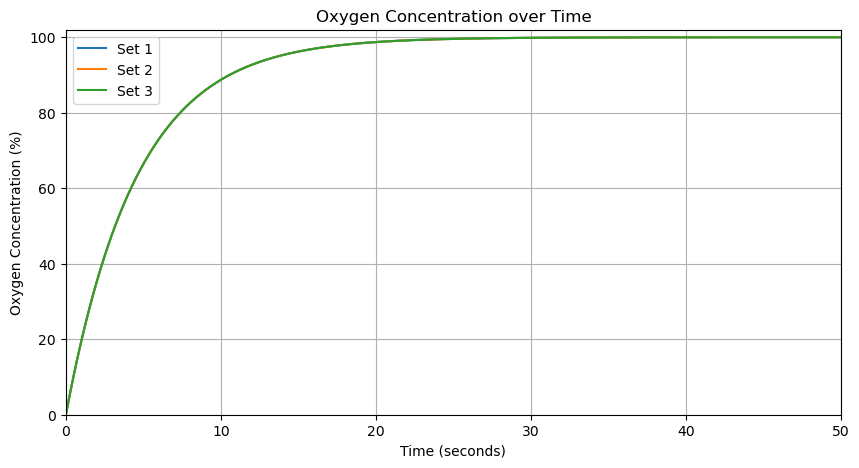

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display, clear_output

# Constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022 ** (T - 20))
    term2 = 0.026 * (((0.5 * Np * rho_f * N ** 3 * Di ** 5) / (pi * D ** 2 * h)) ** 0.4)
    term3 = (v_s ** 0.5) * (100 - C_l)
    return term1 * term2 * term3

# Function to solve the differential equation and return C_l
def solve_kla(T, Np, h, N, D, Di, v_s):
    time_span = np.linspace(0, 50, 1000)
    C_l_initial = 0
    C_l = odeint(kla_equation, C_l_initial, time_span, args=(T, Np, h, N, D, Di, v_s))
    return C_l.flatten(), time_span

# Function to create a set of sliders
def create_sliders():
    return {
        'T': widgets.FloatSlider(min=20, max=50, step=1, value=37, description='Temperature (°C)',),
        'Np': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, description='Impeller Power No.'),
        'h': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, description='Reactor Height (m)'),
        'N': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, description='Rotation Speed (1/s)'),
        'D': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, description='Reactor Diameter (m)'),
        'Di': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, description='Impeller Diameter (m)'),
        'v_s': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, description='Aeration Rate (m^3/s)'),
    }

# Global figure to allow for interactive updates
fig, ax = plt.subplots(figsize=(10, 5))

# Function to update the plot
def update_plot(*args):
    ax.clear()
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Oxygen Concentration (%)')
    ax.set_ylim(0, 102)
    ax.set_xlim(0, 50)
    ax.set_title('Oxygen Concentration over Time')
    ax.grid(True)
    
    # Plot each dataset with updated values from sliders
    for i, sliders in enumerate([sliders_set1, sliders_set2, sliders_set3], start=1):
        C_l, time_span = solve_kla(**{key: slider.value for key, slider in sliders.items()})
        ax.plot(time_span, C_l, label=f'Set {i}')
    
    ax.legend()
    fig.canvas.draw()

# Creating three sets of sliders
sliders_set1 = create_sliders()
sliders_set2 = create_sliders()
sliders_set3 = create_sliders()

# Observe changes in sliders and update the plot accordingly
for sliders in [sliders_set1, sliders_set2, sliders_set3]:
    for slider in sliders.values():
        slider.observe(update_plot, 'value')

# Creating VBox for each set for vertical alignment
vbox1 = widgets.VBox(list(sliders_set1.values()))
vbox2 = widgets.VBox(list(sliders_set2.values()))
vbox3 = widgets.VBox(list(sliders_set3.values()))

# Creating an HBox to contain all VBoxes for horizontal alignment
hbox_sliders = widgets.HBox([vbox1, vbox2, vbox3])

# Initialize plot
update_plot()

# Display the UI
display(hbox_sliders)


# 3sliders - 1 graph - ( Useful) (looks meh)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Define constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022**(T-20))
    term2 = 0.026 * (((0.5*Np*rho_f*N**3*Di**5)/(pi*D**2*h))**0.4)
    term3 = (v_s**0.5)*(100-C_l)
    return term1*term2*term3

# Define the plotting function
def plot_all(T1, Np1, h1, N1, D1, Di1, v_s1,
             T2, Np2, h2, N2, D2, Di2, v_s2,
             T3, Np3, h3, N3, D3, Di3, v_s3):
    
    time_span = np.linspace(0, 50, 1000)
    initial_C_l = 0
    
    # Solve for all three sets
    C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
    C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
    C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()

    # Plot all three sets on the same axes
    plt.figure(figsize=(10, 5))
    plt.plot(time_span, C_l1, label='Plot 1', color='blue')
    plt.plot(time_span, C_l2, label='Plot 2', color='orange')
    plt.plot(time_span, C_l3, label='Plot 3', color='green')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

#Display graph 1 Title
display(HTML(f"<strong>Plot 1:</strong>"))
# Create slider sets
sliders_set1 = {'T': widgets.FloatSlider(min=20, max=50, step=1, value=37, continuous_update=False, description='Plot1: T'),
                'Np': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Plot1: Np'),
                'h': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, continuous_update=False, description='Plot1: h'),
                'N': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Plot1: N'),
                'D': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Plot1: D'),
                'Di': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Plot1: Di'),
                'v_s': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, continuous_update=False, description='Plot1: v_s'),
                # ... create all sliders for set 1
               }

sliders_set2 = {'T': widgets.FloatSlider(min=20, max=50, step=1, value=24, continuous_update=False, description='Temperature'),
                'Np': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Impeller Power No.'),
                'h': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, continuous_update=False, description='Reactor Height (m)'),
                'N': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Rotation Speed (1/s)'),
                'D': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Reactor Diameter (m)'),
                'Di': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Impeller Diameter (m)'),
                'v_s': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, continuous_update=False, description='Aeration Rate (m^3/s)'),
                # ... create all sliders for set 2
               }

sliders_set3 = {'T': widgets.FloatSlider(min=20, max=50, step=1, value=50, continuous_update=False, description='Temperature'),
                'Np': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Impeller Power No.'),
                'h': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, continuous_update=False, description='Reactor Height (m)'),
                'N': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Rotation Speed (1/s)'),
                'D': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Reactor Diameter (m)'),
                'Di': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Impeller Diameter (m)'),
                'v_s': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, continuous_update=False, description='Aeration Rate (m^3/s)'),
                # ... create all sliders for set 3
               }

# Interactive plot
interactive_plot = widgets.interactive(plot_all,
                                       T1=sliders_set1['T'], Np1=sliders_set1['Np'],h1=sliders_set1['h'],N1=sliders_set1['N'],D1=sliders_set1['D'],Di1=sliders_set1['Di'],v_s1=sliders_set1['v_s'], # ... all sliders from set 1
                                       T2=sliders_set2['T'], Np2=sliders_set2['Np'],h2=sliders_set2['h'],N2=sliders_set2['N'],D2=sliders_set2['D'],Di2=sliders_set2['Di'],v_s2=sliders_set2['v_s'], # ... all sliders from set 2
                                       T3=sliders_set3['T'], Np3=sliders_set3['Np'],h3=sliders_set3['h'],N3=sliders_set3['N'],D3=sliders_set3['D'],Di3=sliders_set3['Di'],v_s3=sliders_set3['v_s'], # ... all sliders from set 3
                                      )

# Display the interactive plot with sliders
display(interactive_plot)


interactive(children=(FloatSlider(value=37.0, continuous_update=False, description='Plot1: T', max=50.0, min=2…

# 3sliders - 1 graph - (Perfect works) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Define constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022**(T-20))
    term2 = 0.026 * (((0.5*Np*rho_f*N**3*Di**5)/(pi*D**2*h))**0.4)
    term3 = (v_s**0.5)*(100-C_l)
    return term1*term2*term3

# Define the plotting function
def plot_all(T1, Np1, h1, N1, D1, Di1, v_s1,
             T2, Np2, h2, N2, D2, Di2, v_s2,
             T3, Np3, h3, N3, D3, Di3, v_s3):
    
    time_span = np.linspace(0, 50, 1000)
    initial_C_l = 0
    
    # Solve for all three sets
    C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
    C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
    C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()

    # Plot all three sets on the same axes
    plt.figure(figsize=(10, 5))
    plt.plot(time_span, C_l1, label='Plot 1', color='blue')
    plt.plot(time_span, C_l2, label='Plot 2', color='orange')
    plt.plot(time_span, C_l3, label='Plot 3', color='green')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

#Display graph 1 Title
#display(HTML(f"<strong><u>Plot Values:</u></strong> \n"))

# Create slider sets
sliders_set1 = {'T1': widgets.FloatSlider(min=20, max=50, step=1, value=37, continuous_update=False, description='Plot1: T'),
                'Np1': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Plot1: Np'),
                'h1': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.1, continuous_update=False, description='Plot1: h'),
                'N1': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Plot1: N'),
                'D1': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Plot1: D'),
                'Di1': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Plot1: Di'),
                'v_s1': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, continuous_update=False, description='Plot1: v_s'),
                # ... create all sliders for set 1
               }

sliders_set2 = {'T2': widgets.FloatSlider(min=20, max=50, step=1, value=24, continuous_update=False, description='Plot2: T'),
                'Np2': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Plot2: Np'),
                'h2': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Plot2: h'),
                'N2': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Plot2: N'),
                'D2': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Plot2: D'),
                'Di2': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Plot2: Di'),
                'v_s2': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=40, continuous_update=False, description='Plot2: v_s'),
                # ... create all sliders for set 2
               }

sliders_set3 = {'T3': widgets.FloatSlider(min=20, max=50, step=1, value=50, continuous_update=False, description='Plot3: T'),
                'Np3': widgets.FloatSlider(min=1.5, max=36, step=1.5, value=6, continuous_update=False, description='Plot3: Np'),
                'h3': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.3, continuous_update=False, description='Plot3: h'),
                'N3': widgets.FloatSlider(min=1, max=35, step=0.1, value=16.7, continuous_update=False, description='Plot3: N'),
                'D3': widgets.FloatSlider(min=0.05, max=0.3, step=0.05, value=0.05, continuous_update=False, description='Plot3: D'),
                'Di3': widgets.FloatSlider(min=0.005, max=0.05, step=0.005, value=0.01, continuous_update=False, description='Plot3: Di'),
                'v_s3': widgets.FloatSlider(min=0.2, max=42, step=0.2, value=21.23, continuous_update=False, description='Plot3: v_s'),
                # ... create all sliders for set 3
               }

# Create VBox for each set
vbox_set1 = widgets.VBox(children=[sliders_set1[key] for key in sorted(sliders_set1)])
vbox_set2 = widgets.VBox(children=[sliders_set2[key] for key in sorted(sliders_set2)])
vbox_set3 = widgets.VBox(children=[sliders_set3[key] for key in sorted(sliders_set3)])
# Repeat for vbox_set2 and vbox_set3

# Combine the VBox widgets into an HBox
hbox_all_sliders = widgets.HBox(children=[vbox_set1, vbox_set2, vbox_set3])

# Define the interactive_output widget with correct argument names
interactive_plot = widgets.interactive_output(
    plot_all,
    {**sliders_set1, **sliders_set2, **sliders_set3}
)

# Display the layout
display(HTML("<strong><u>Select Parameters for Three Plots:</u></strong>"), hbox_all_sliders, interactive_plot)

Output()

# 3sliders - 1 graph - (Dropdown options)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Define constants
rho_f = 1000.0  # medium density (kg m^-3)
pi = np.pi

# Define the differential equation
def kla_equation(C_l, t, T, Np, h, N, D, Di, v_s):
    term1 = (1.022**(T-20))
    term2 = 0.026 * (((0.5*Np*rho_f*N**3*Di**5)/(pi*D**2*h))**0.4)
    term3 = (v_s**0.5)*(100-C_l)
    return term1*term2*term3

# Define the plotting function
def plot_selected_plot(plot_selection, T1, Np1, h1, N1, D1, Di1, v_s1,
                        T2, Np2, h2, N2, D2, Di2, v_s2,
                        T3, Np3, h3, N3, D3, Di3, v_s3):
    
    time_span = np.linspace(0, 50, 1000)
    initial_C_l = 0
    
    plt.figure(figsize=(10, 5))
    # Determine which plots to show based on the dropdown selection
    if plot_selection == 'Plot 1':
        C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
        plt.plot(time_span, C_l1, label='Plot 1', color='blue')
        
    elif plot_selection == 'Plot 2':
        C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
        plt.plot(time_span, C_l2, label='Plot 2', color='orange')
    elif plot_selection == 'Plot 3':
        C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()
        plt.plot(time_span, C_l3, label='Plot 3', color='green')
    elif plot_selection == 'Plot 1 & 2':
        C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
        plt.plot(time_span, C_l1, label='Plot 1', color='blue')
        C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
        plt.plot(time_span, C_l2, label='Plot 2', color='orange')
    elif plot_selection == 'Plot 1 & 3':
        C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
        plt.plot(time_span, C_l1, label='Plot 1', color='blue')
        C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()
        plt.plot(time_span, C_l3, label='Plot 3', color='green')
    elif plot_selection == 'Plot 2 & 3':
        C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
        plt.plot(time_span, C_l2, label='Plot 2', color='orange')
        C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()
        plt.plot(time_span, C_l3, label='Plot 3', color='green')
    elif plot_selection == 'All 3 Plots':
        C_l1 = odeint(kla_equation, initial_C_l, time_span, args=(T1, Np1, h1, N1, D1, Di1, v_s1)).flatten()
        plt.plot(time_span, C_l1, label='Plot 1', color='blue')
        C_l2 = odeint(kla_equation, initial_C_l, time_span, args=(T2, Np2, h2, N2, D2, Di2, v_s2)).flatten()
        plt.plot(time_span, C_l2, label='Plot 2', color='orange')
        C_l3 = odeint(kla_equation, initial_C_l, time_span, args=(T3, Np3, h3, N3, D3, Di3, v_s3)).flatten()
        plt.plot(time_span, C_l3, label='Plot 3', color='green')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Oxygen Concentration (%)')
    plt.ylim(0, 102)
    plt.title('Oxygen Concentration over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create dropdown widget for selecting which plot to show
plot_selection_dropdown = widgets.Dropdown(
    options=['Plot 1', 'Plot 2', 'Plot 3', 'Plot 1 & 2', 'Plot 1 & 3', 'Plot 2 & 3', 'All 3 Plots'],
    value='All 3 Plots',
    description='Select Plot:'
)

# Define the interactive_output widget with correct argument names
interactive_plot = widgets.interactive_output(
    plot_selected_plot,
    {'plot_selection': plot_selection_dropdown, **sliders_set1, **sliders_set2, **sliders_set3}
)

# Display the layout including the dropdown
display(HTML("<strong><u>Select Parameters for Three Plots:</u></strong>"), plot_selection_dropdown, hbox_all_sliders, interactive_plot)

Dropdown(description='Select Plot:', index=6, options=('Plot 1', 'Plot 2', 'Plot 3', 'Plot 1 & 2', 'Plot 1 & 3…

Output()